# 6

## a)
Construa o diagrama de dispersão para estes dados e adicione a recta de regressão. Comente os
resultados.

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
import numpy as np
from scipy.stats import levene
from scipy.stats import shapiro

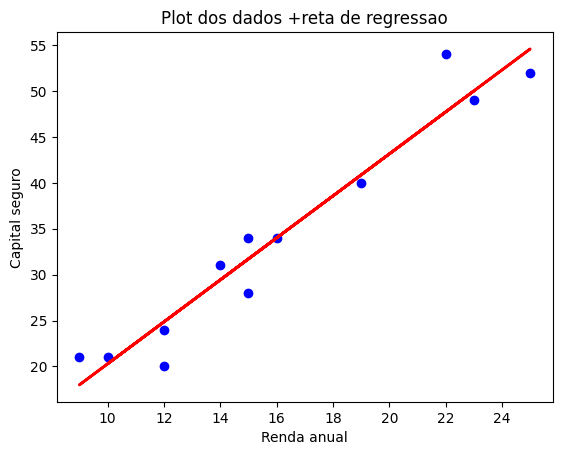

In [2]:
Rend = [14, 19, 23, 12, 9, 15, 22, 25, 15, 10, 12, 16]
Capit = [31, 40, 49, 20, 21, 34, 54, 52, 28, 21, 24, 34]
Rendc = sm.add_constant(Rend)
modelo = sm.OLS(Capit, Rendc)
res7 = modelo.fit()
Capit_pred = res7.predict(Rendc)
plt.scatter(Rend, Capit, color='blue')
plt.plot(Rend, Capit_pred, color='red', linewidth=2)
plt.title('Plot dos dados +reta de regressao')
plt.xlabel('Renda anual')
plt.ylabel('Capital seguro')
plt.show()

### Conclusão
O modelo linear parece ser um bom modelo para este conjunto de dados.

## b)
Estime o montante do seguro de vida para um agregado familiar com rendimento anual de 20000
u.m.

In [3]:
cap20_previsto = res7.predict([1, 20])
print('Capital de seguro previsto:')
print(cap20_previsto[0])

Capital de seguro previsto:
43.15436241610739


### c)
Verifique se os resíduos gozam de homocedasticidade e se são independentes.

homocedasticidade

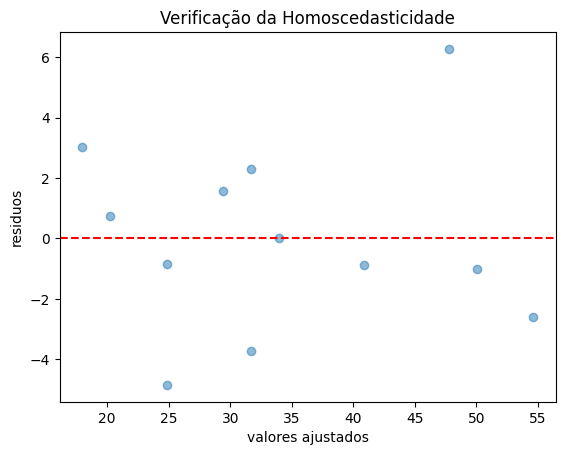

In [4]:
val_ajust7 = res7.fittedvalues
residuos7 = res7.resid
plt.scatter(val_ajust7, residuos7, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Verificação da Homoscedasticidade')
plt.xlabel('valores ajustados')
plt.ylabel('residuos')
plt.show()

A análise do gráfico não revela a existência de tendência. como a amostra é pequena iremos
proceder como no exercício 5.

In [7]:
med7 = np.median(residuos7)
infr7 = residuos7[residuos7 < med7]
supr7 = residuos7[residuos7 > med7]
st, pval = levene(infr7, supr7)
print(pval)

0.8468793954225782


### Comentário
Tomando o teste de Levene como um complemento à análise do gráfico dos valores ajustados vs
resíduos consideramos que se verifica a homocedasticidade.

### Independência dos resíduos

In [9]:
durbinWatson7 = durbin_watson(residuos7)
print('valor da estatística DW:', durbinWatson7)

valor da estatística DW: 1.954393934499369


### Comentário
Tem-se 1,5 $\leq$ DW $\leq$ 2,5, logo podemos assumir a independência dos resíduos.

## d)
Teste a normalidade dos resíduos.


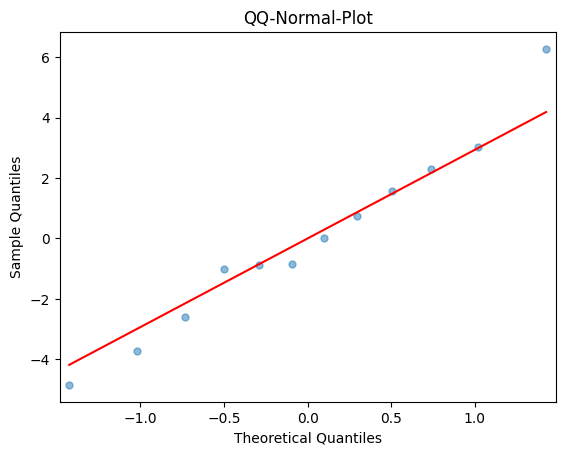

In [10]:
sm.qqplot(residuos7, line='s', markersize=5, alpha=0.5)
plt.title('QQ-Normal-Plot')
plt.show()

In [13]:
st7, pv7 = shapiro(residuos7)
print('Shapiro p-value:')
print(pv7)

Shapiro p-value:
0.9829573950760412


### Conclusão
O qq-plot e o teste de Shapiro suportam a normalidade dos resíduos